In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
def rayleigh_ritz(n, nmodes=4, nx=100):   
    # Stiffness and mass matrices.
    K = np.zeros((n, n))
    M = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            ipj = i + j
            K[i, j] = 4*(i + 2)*(j + 2)*(i**2 + 3*i*j + 4*ipj + j**2 + 3)/((ipj + 1)*(ipj + 2)*(ipj + 3))
            M[i, j] = 4/((ipj + 5)*(ipj + 6)*(ipj + 7))
    
    # Eigenvalues and eigenvectors.
    A = np.linalg.inv(M) @ K
    eigenvalues, eigenvectors = np.linalg.eig(A)
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Natural frequencies and modes.
    freqs = np.empty(n)
    modes = []
    xv = np.linspace(0.0, 1.0, nx)
    modes = np.zeros((min(n, nmodes), nx))
    
    for j in range(min(n, nmodes)):
        egval = eigenvalues[j]
        egvec = eigenvectors[:, j]
        
        freqs[j] = egval**0.25
        for i in range(n):
            modes[j] += egvec[i] * xv**(i+2) * (1-xv)
        
        modes[j] /= np.max(np.abs(modes[j]))  # Normalize mode

    return freqs, modes

In [3]:
# Analytical results.
freq = np.array([3.92660231, 7.06858275, 10.21017612, 13.35176878])
sigma = np.array([1.000777304, 1.000001445, 1.0, 1.0])
fmode = lambda n, x: np.cosh(freq[n]*x) - np.cos(freq[n]*x) \
                   - sigma[n]*(np.sinh(freq[n]*x) - np.sin(freq[n]*x))

xv = np.linspace(0.0, 1.0, 100)

mode1 = fmode(0, xv)
mode2 = fmode(1, xv)
mode3 = fmode(2, xv)
mode4 = fmode(3, xv)

# Normalize modes.
mode1 /= np.max(np.abs(mode1))
mode2 /= np.max(np.abs(mode2))
mode3 /= np.max(np.abs(mode3))
mode4 /= np.max(np.abs(mode4))

In [4]:
# Rayleigh-Ritz results.
nmodes = 4  # Number of modes
nmax = 8  # Maximum number of terms.
freqrr = np.full((nmax, nmax), np.nan)

for i in range(nmax):
    freqs, modes = rayleigh_ritz(i+1, nmodes)
    freqrr[i, :i+1] = freqs

mode1rr = modes[0]
mode2rr = modes[1]
mode3rr = modes[2]
mode4rr = modes[3]

# Make sure analytical and numerical modes have the same sign for comparison.
mode1rr *= np.sign(np.mean(mode1rr * mode1))
mode2rr *= np.sign(np.mean(mode2rr * mode2))
mode3rr *= np.sign(np.mean(mode3rr * mode3))
mode4rr *= np.sign(np.mean(mode4rr * mode4))

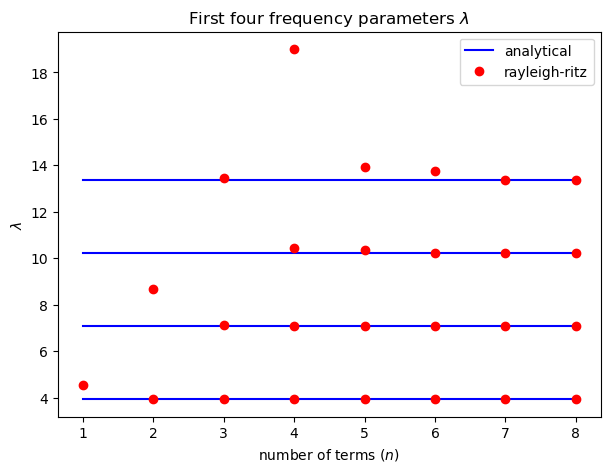

In [5]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlabel(r'number of terms ($n$)')
ax.set_ylabel(r'$\lambda$')
ax.set_title(r'First four frequency parameters $\lambda$')

nv = np.array([1, nmax])
w1 = freq[0] * np.ones(2)
w2 = freq[1] * np.ones(2)
w3 = freq[2] * np.ones(2)
w4 = freq[3] * np.ones(2)

ax.plot(nv, w1, '-b', label='analytical')
ax.plot(nv, w2, '-b')
ax.plot(nv, w3, '-b')
ax.plot(nv, w4, '-b')

nvrr = np.arange(1, nmax+1)
w1rr = freqrr[:, 0]
w2rr = freqrr[:, 1]
w3rr = freqrr[:, 2]
w4rr = freqrr[:, 3]

ax.plot(nvrr, w1rr, 'or', label='rayleigh-ritz')
ax.plot(nvrr, w2rr, 'or')
ax.plot(nvrr, w3rr, 'or')
ax.plot(nvrr, w4rr, 'or')

ax.legend()

fig.savefig('freqparams.svg', bbox_inches='tight')
plt.show()

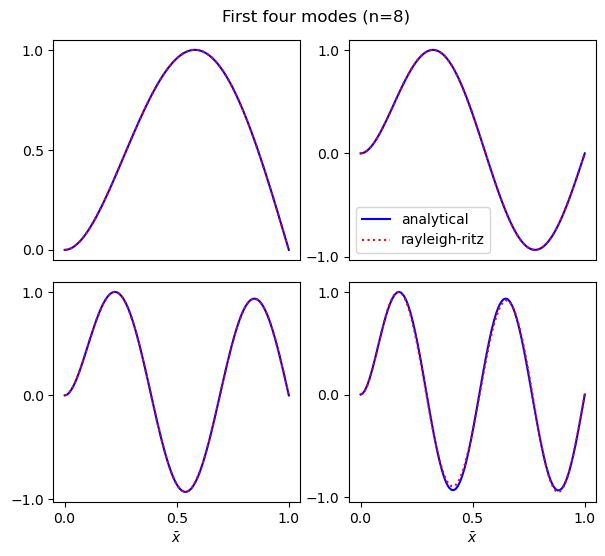

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(7,6))

fig.suptitle('First four modes (n=8)', y=0.93)
plt.subplots_adjust(wspace=0.2, hspace=0.1)

ax[1,0].set_xlabel(r'$\bar{x}$')
ax[1,1].set_xlabel(r'$\bar{x}$')

ax[0,0].xaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

ax[0,0].plot(xv, mode1, '-b', label='analytical')
ax[0,1].plot(xv, mode2, '-b', label='analytical')
ax[1,0].plot(xv, mode3, '-b', label='analytical')
ax[1,1].plot(xv, mode4, '-b', label='analytical')

ax[0,0].plot(xv, mode1rr, ':r', label='rayleigh-ritz')
ax[0,1].plot(xv, mode2rr, ':r', label='rayleigh-ritz')
ax[1,0].plot(xv, mode3rr, ':r', label='rayleigh-ritz')
ax[1,1].plot(xv, mode4rr, ':r', label='rayleigh-ritz')

ax[0,0].set_yticks([0.0, 0.5, 1.0])

for x in ax.ravel()[1:]:
    x.set_yticks([-1.0, 0.0, 1.0])

for x in ax.ravel():
    x.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))

for x in ax.ravel()[2:]:
    x.set_xticks([0.0, 0.5, 1.0])

ax[0,1].legend()

fig.savefig('modes.svg', bbox_inches='tight')
plt.show()